# Machine Learning with Kyendy Mauwi

## K-Means Clustering

### Clustering
There are two types of `clustering`; Hierarchical and Partitional clustering
* Hierarchical clustering has a tree like structure or a parent child relationship. It is further divided into;

    Agglomerative clustering: uses bottom up approach. Begin with each element as a seperate cluster and merge them into successively larger clusters.
    
    Divisive clustering: uses top down approach. Begin with the whole set and proceed to divide it into smaller clusters.
    
* Partitional clustering. it is divided into;

    K-Means clustering: Division of objects into clusters such that each object is in exactly one cluster, not several.
    
    Fuzzy C-Means: Division of objects into clusters such that each object can belong to multiple clusters.
    
    
#### Applications of K-Means Clustering
* Academic performance 
* Diagnostic systems
* Search engines
* Wireless sensor networks

K-Means clustering uses `distance measure`

### Distance Measure
Distance measure will determine the similarity between two elements and it will influence the shape of the clusters.

Some of the distance measures supported are;
* Euclidian distance measure - is the ordinary straight line. It is the distance between two points in euclidian space.

* Manhattan distance measure - is the sum of two horizontal and vertical components or the distance between teo points measred along axes at right angles.

* Squared euclidian distance measure - is the square of the euclidian distance.

* Cosine distance measure - measures the andle between two vectors.

## How K-Means Clustering works

`Example` say you have a dataset for a grocery shop. How would you choose the optimum number of clusters?

1. Elbow point (k) - `Elbow Method`. the idea is to run k-means clustering on the dataset where k is the number of clusters. Within Sum of Squares Wss is defined as the sum of the cluster and its centroid. The smaller the wss, the better the cluster is.

2. Measure the distance - we randomly initialize two points called cluster centroids. Euclidian distance is applied to find out which data point is closest to your centroids. 

3. Groupting based on minimum distance - Based upon the distance from the centroids, the data points will group into clusters.

4. Repositioning the centroids - into the center of the groups. It is the mean point.

5. Convergence - occurs when the clusters become static.

Assuming we have inputs x1, x2, x3,...,xi and the value of `k`
* pick `k` random points as clusters called centroids.
* assign each `xi` to the nearest cluster by calculating it's distance to each centroid.
* find new cluster by taking the average of the assigned points.
* repeat steps 2 and 3 until none of the cluster assignments change.

#### Walmart wants to open a chain of stores across Florida and wants to find out optimal store locations to maximize revenue.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

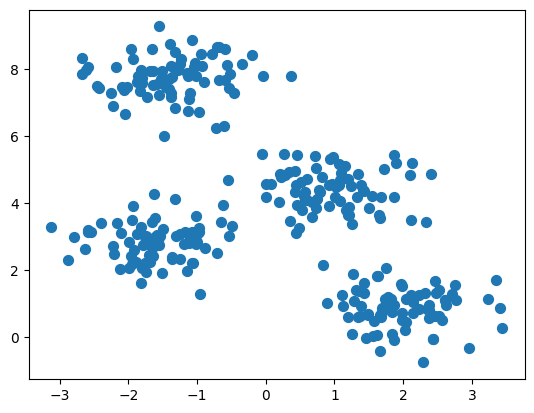

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

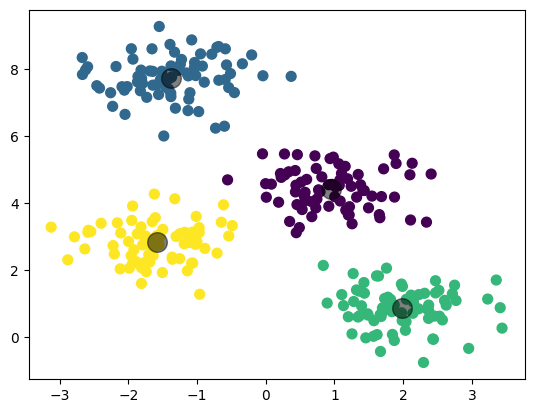

In [5]:
from sklearn.metrics import pairwise_distances_argmin # cals the euclidian distance from predefined points

def find_clusters(X, n_clusters, rseed=2):
    # randomly assign clusters (centroids)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True: #infinite loop, breaks when the new centroids are static
        # assign labels based on the closest centers
        labels = pairwise_distances_argmin(X, centers)
        
        #find new centroids from mean points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        #check for convergence. compare centroid positions after relocation
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black',  s=200, alpha=.5)

# K-Means for Color Compression

Common in image processing when you have an image with millions of colors but you can't render it on some devices that do not have enough memory.

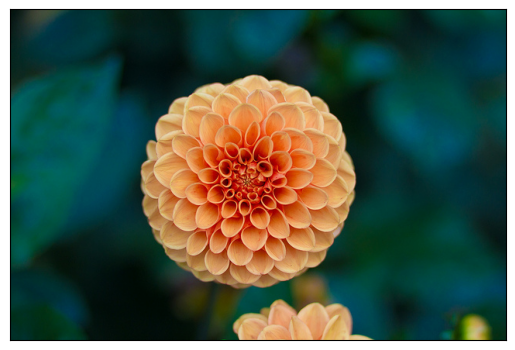

In [8]:
# loading image example
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")
# Create axes and display the image
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(flower)

plt.show()

In [10]:
# image shape
flower.shape # overall size the 3rd digit shows the layers RGB

(427, 640, 3)

In [12]:
# raw data
flower # the data is large and needs to be normalized

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [15]:
# normalization (use 0...1 scale)
flower2 = flower / 255.0 # divide by 255
flower2 = flower2.reshape(427 * 640, 3) 
flower2.shape

(273280, 3)

In [17]:
flower2 # new values are between 0 and 1 after normalization

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

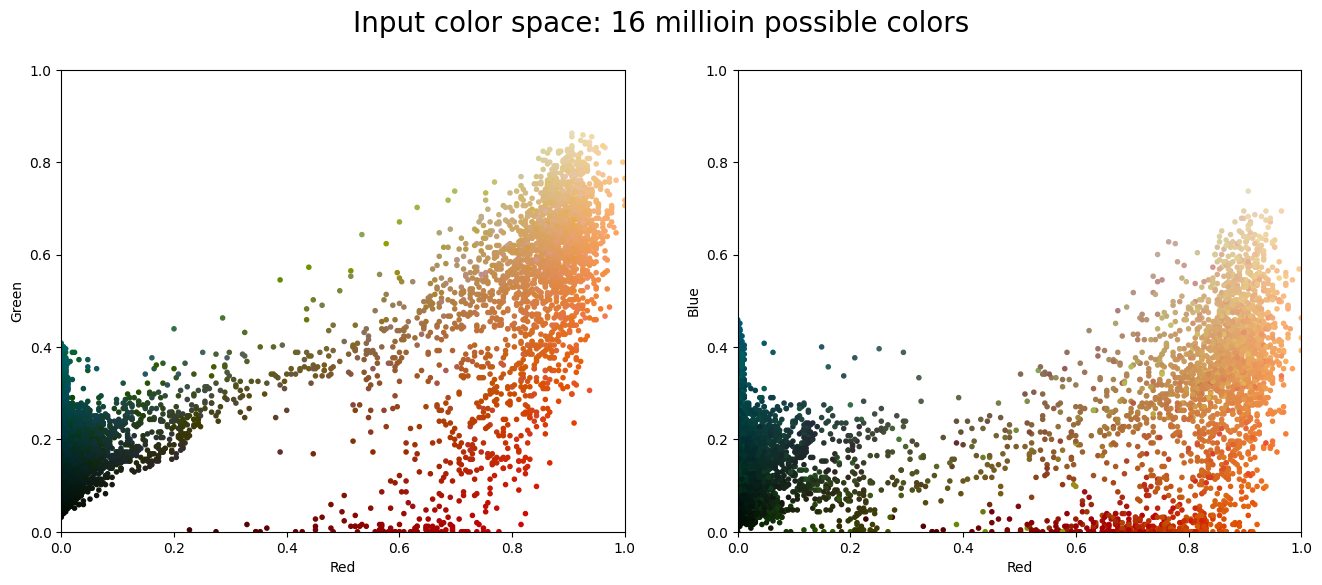

In [26]:
# visualization with 10000 random points original color distribution
def plot_pixels(flower2, title, colors = None, N = 10000):
    if colors is None:
        colors = flower2
        
    #pick random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(flower2.shape[0])[:N]
    colors = colors[i]
    R, G, B = flower2[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0,1 ))
    
    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0,1 ))
    
    fig.suptitle(title, size = 20);
    
plot_pixels(flower2, title = "Input color space: 16 millioin possible colors")

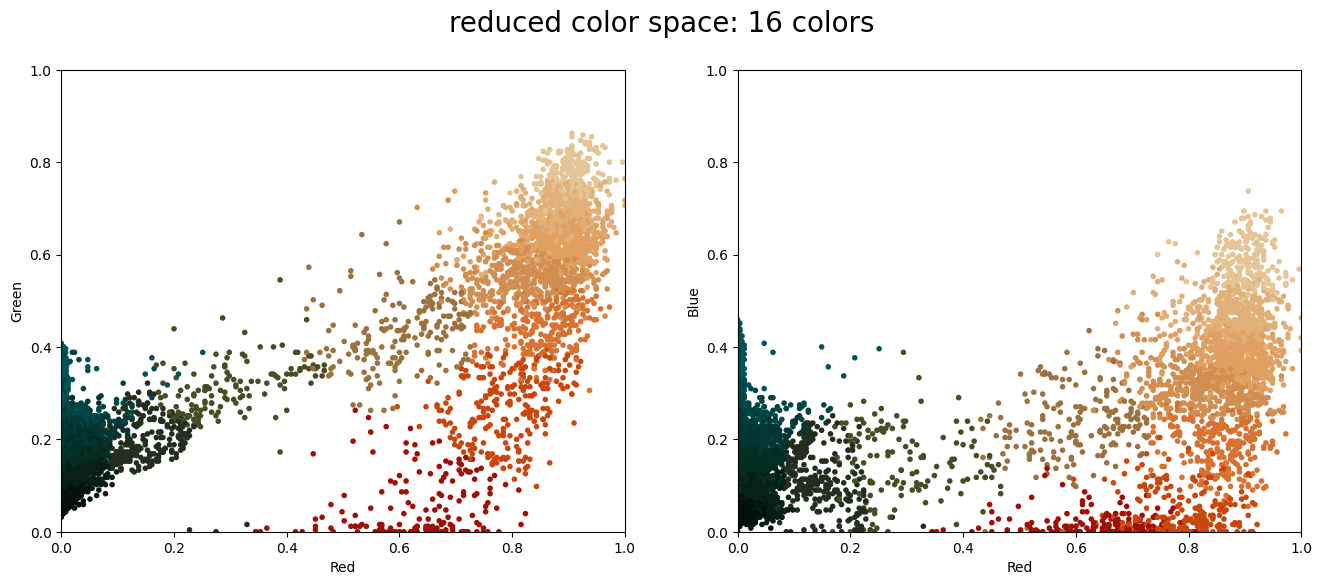

In [28]:
# use K-Means clustering to create 16 clusters for thr various colors
# k-means is time consuming so we use minibatchkmeans
import warnings; warnings.simplefilter('ignore') # to fix warnings

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(flower2)
new_colors = kmeans.cluster_centers_[kmeans.predict(flower2)]

plot_pixels(flower2, colors = new_colors, title = "reduced color space: 16 colors")

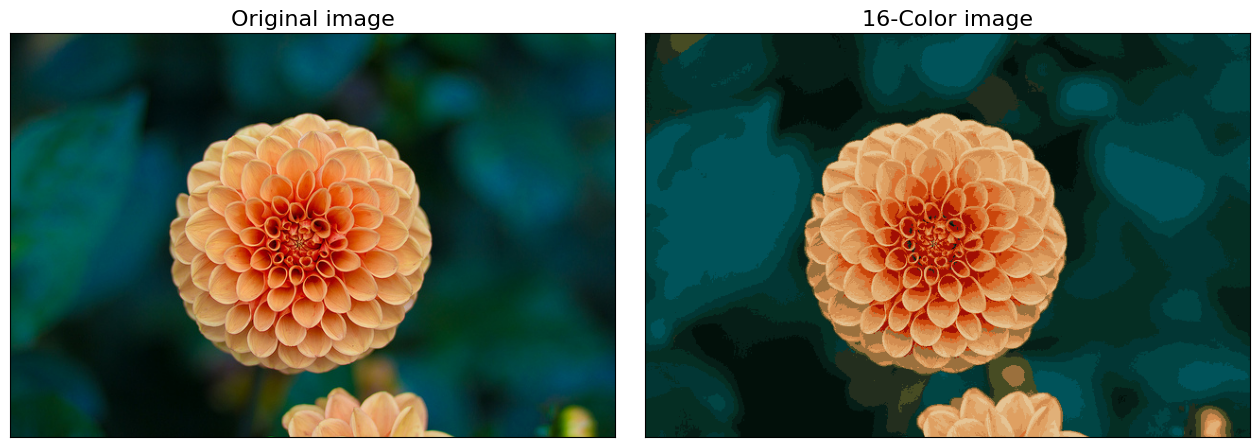

In [34]:
# applying new colors to the image
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = .05)
ax[0].imshow(flower)
ax[0].set_title('Original image', size = 16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-Color image', size = 16);

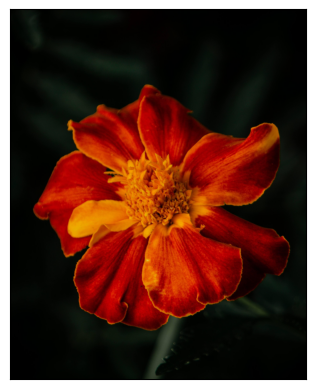

In [40]:
# loading image example 2
from PIL import Image

ua = "Data/flower.jpg" # image path

# open image using pillow
img = Image.open(ua)

# Create axes and display the image
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img)

plt.show()

In [43]:
img.size

(3200, 4000)

In [47]:
# convert to float
img_array = np.array(img)
img_array

array([[[2, 4, 1],
        [2, 4, 1],
        [2, 4, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 4, 1],
        [2, 4, 1],
        [2, 4, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 4, 1],
        [2, 4, 1],
        [2, 4, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [50]:
# normalize using 0...1 scale
img_array2 = img_array / 255.0 # divide by 255
#reshape the image array
height, width, channels = img_array2.shape
img_array2 = img_array2.reshape(height * width, channels) 
img_array2.shape

(12800000, 3)

In [52]:
img_array2 # has been normalized and reshaped

array([[0.00784314, 0.01568627, 0.00392157],
       [0.00784314, 0.01568627, 0.00392157],
       [0.00784314, 0.01568627, 0.00392157],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

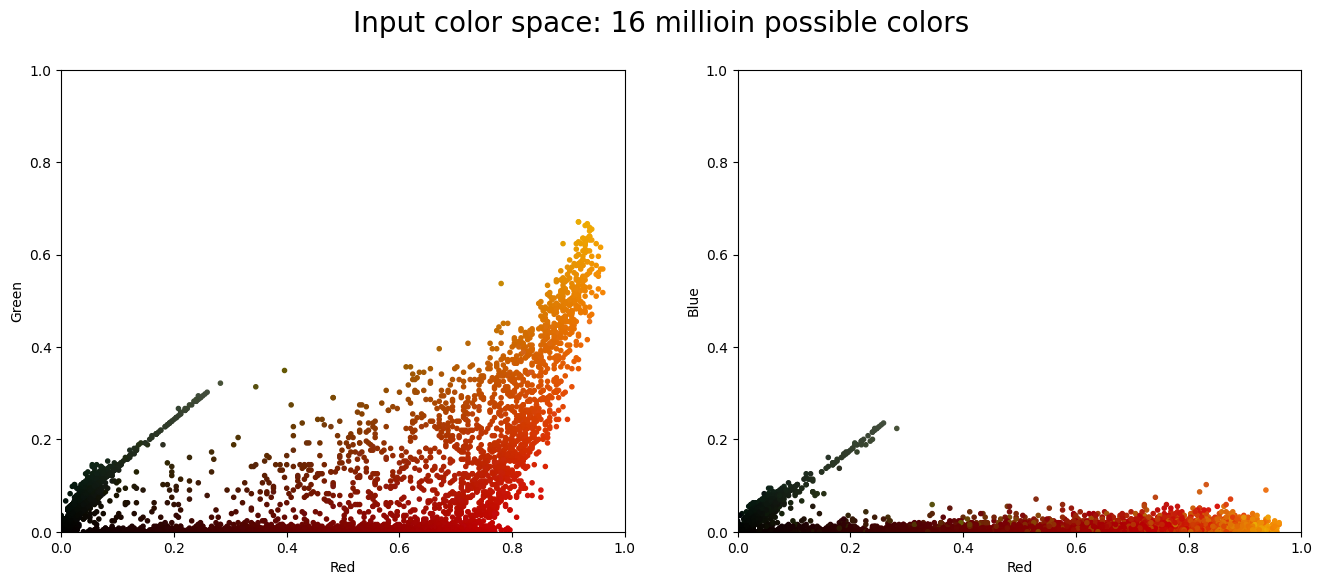

In [54]:
# visualization with 10000 random points original color distribution
def plot_pixels(img_array2, title, colors = None, N = 10000):
    if colors is None:
        colors = img_array2
        
    #pick random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(img_array2.shape[0])[:N]
    colors = colors[i]
    R, G, B = img_array2[i].T
    
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].scatter(R, G, color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0, 1), ylim = (0,1 ))
    
    ax[1].scatter(R, B, color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0,1 ))
    
    fig.suptitle(title, size = 20);
    
plot_pixels(img_array2, title = "Input color space: 16 millioin possible colors")

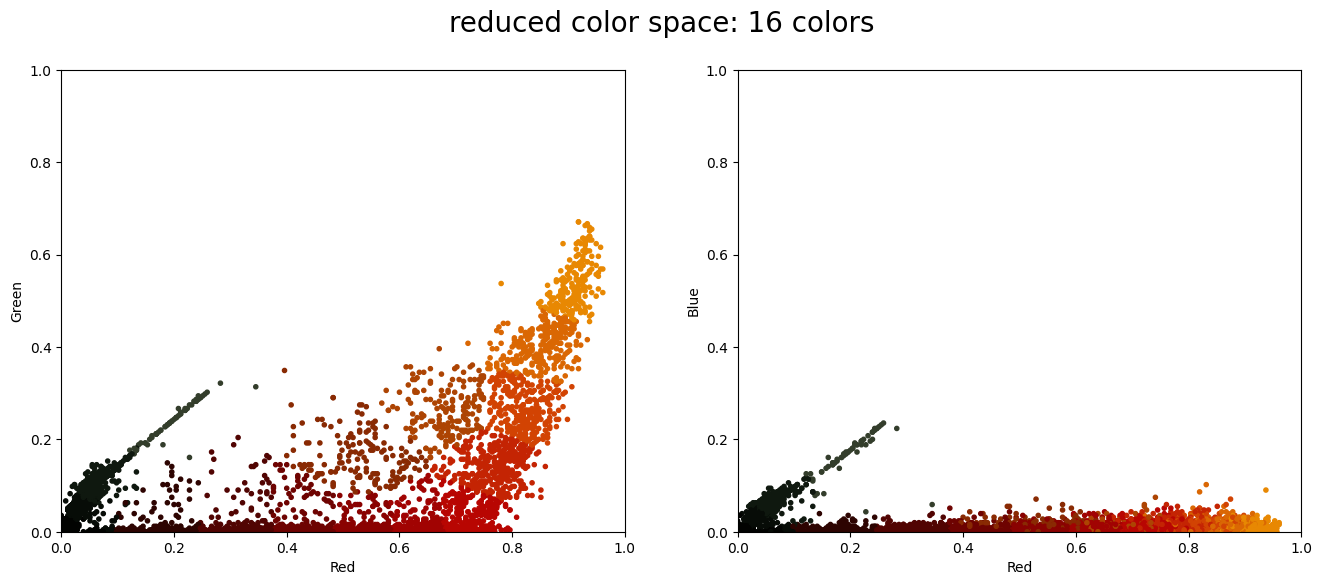

In [56]:
# use K-Means clustering to create 16 clusters for thr various colors
# k-means is time consuming so we use minibatchkmeans

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(img_array2)
new_colors = kmeans.cluster_centers_[kmeans.predict(img_array2)]

plot_pixels(img_array2, colors = new_colors, title = "reduced color space: 16 colors")

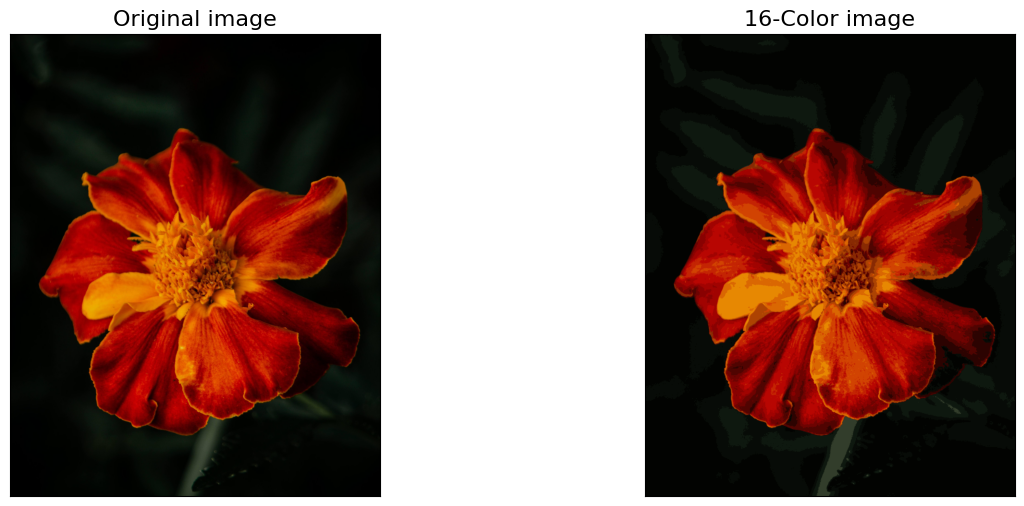

In [57]:
# applying new colors to the image
img_array_recolored = new_colors.reshape(img_array.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks = []))
fig.subplots_adjust(wspace = .05)
ax[0].imshow(img_array)
ax[0].set_title('Original image', size = 16)
ax[1].imshow(img_array_recolored)
ax[1].set_title('16-Color image', size = 16);